In [72]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

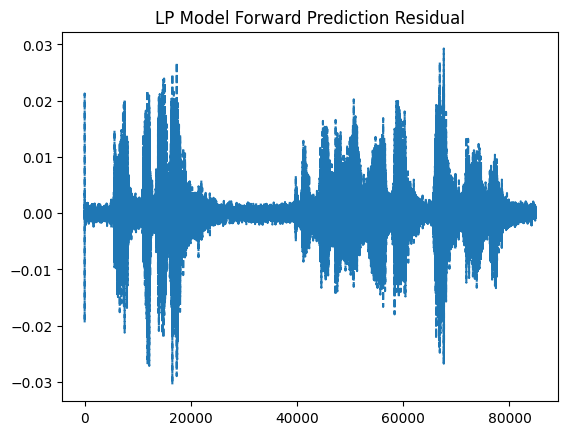

In [73]:
y, sr = librosa.load('a.wav')
y = y[0:88200]
a = librosa.lpc(y, order=10)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)
fig, ax = plt.subplots()
lp_r=y-y_hat
ax.plot(lp_r, linestyle='--')
ax.set_title('LP Model Forward Prediction Residual')
plt.show()

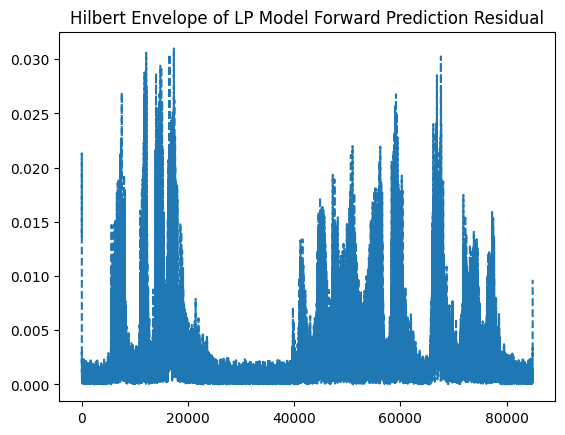

In [74]:

# compute hilbert envelope of the residual
hilbert_envelope = np.abs(scipy.signal.hilbert(lp_r))
fig, ax = plt.subplots()
ax.plot(hilbert_envelope, linestyle='--')
ax.set_title('Hilbert Envelope of LP Model Forward Prediction Residual')
plt.show()


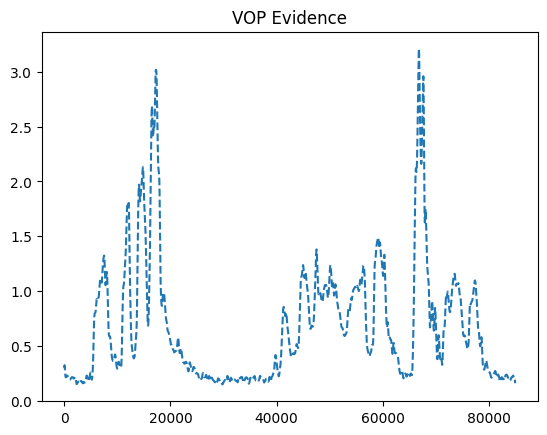

In [75]:
# Find the VOP evidence by convolving the Hilbert Envelope with modified Gaussian window of size 800
gaussian_window = scipy.signal.gaussian(800, std=100)
vop_evidence = np.convolve(hilbert_envelope, gaussian_window, mode='same')
fig, ax = plt.subplots()
ax.plot(vop_evidence, linestyle='--')
ax.set_title('VOP Evidence')
plt.show()

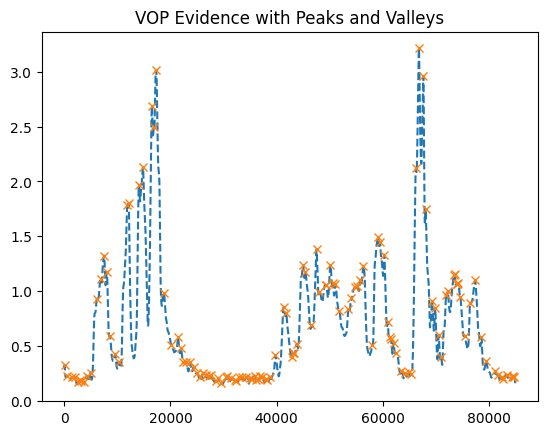

In [76]:
# Identify all peaks preceded with negative regions known as valleys
peaks, _ = scipy.signal.find_peaks(vop_evidence)
valleys, _ = scipy.signal.find_peaks(-1 * vop_evidence)
valleys = valleys[vop_evidence[valleys] < 0.1 * np.max(vop_evidence)]
fig, ax = plt.subplots()
ax.plot(vop_evidence, linestyle='--')
ax.plot(peaks, vop_evidence[peaks], "x")
# ax.plot(valleys, vop_evidence[valleys], "x")
ax.set_title('VOP Evidence with Peaks and Valleys')
plt.show()

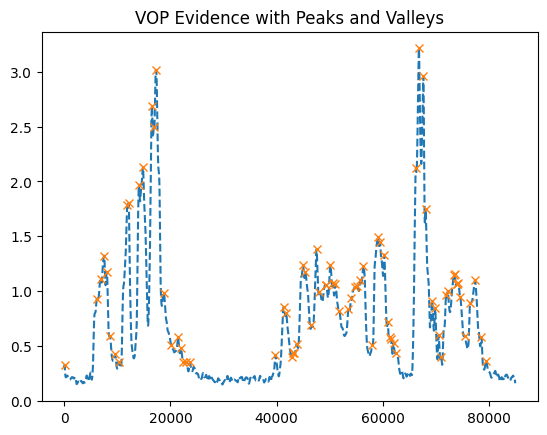

In [77]:
# Choose peaks only with deep valleys, else eliminate the peak
peaks = peaks[vop_evidence[peaks] > 0.1 * np.max(vop_evidence)]
valleys = valleys[vop_evidence[valleys] < 0.1 * np.max(vop_evidence)]
fig, ax = plt.subplots()
ax.plot(vop_evidence, linestyle='--')
ax.plot(peaks, vop_evidence[peaks], "x")
# ax.plot(valleys, vop_evidence[valleys], "x")
ax.set_title('VOP Evidence with Peaks and Valleys')
plt.show()


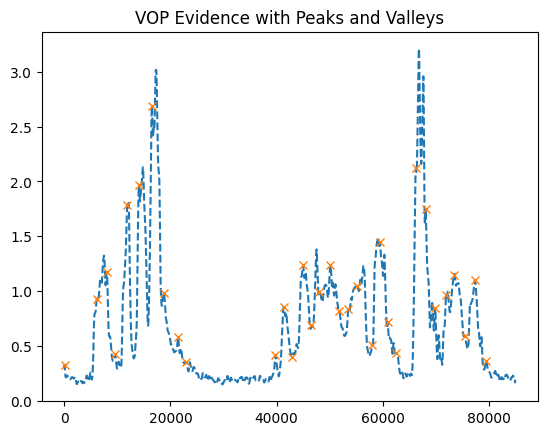

In [78]:
# Eliminate the peaks which are closer to peaks with distance less than 65ms
prev_elem = peaks[0]
new_list = [prev_elem]  # <====== initialise with one element
for elem in peaks[1:]:
    if abs(new_list[-1]-elem) >= 0.065*sr:
         new_list.append(elem)  # <===== append the new element
         prev_elem = elem  # <===== indented more (inside "if" block)

peaks = np.array(new_list)
fig, ax = plt.subplots()
ax.plot(vop_evidence, linestyle='--')
ax.plot(peaks, vop_evidence[peaks], "x")
# ax.plot(valleys, vop_evidence[valleys], "x")
ax.set_title('VOP Evidence with Peaks and Valleys')
plt.show()

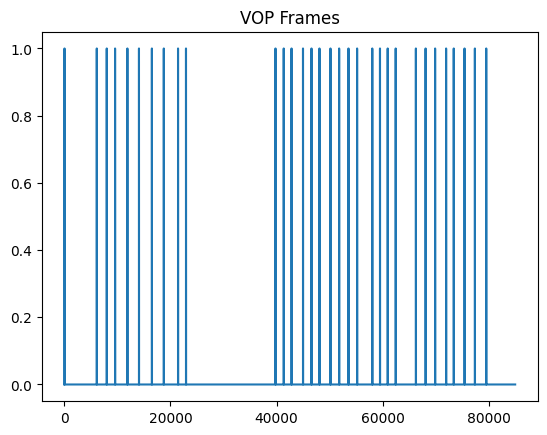

In [79]:
# Find the frame in which the selected peaks occur and label them as VOP frames
vop_frames = np.zeros(len(y))
for i in peaks:
    vop_frames[i] = 1
fig, ax = plt.subplots()
ax.plot(vop_frames, linestyle='-')
ax.set_title('VOP Frames')
plt.show()